<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/Makine%20%C3%96%C4%9Frenmesi/ML_PolylomialLR_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns  
from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Makine Öğrenmesi/polynomial+regression.csv',sep=';')
data.head()

,araba_fiyat,araba_max_hiz
0,60,180
1,70,180
2,80,200
3,100,200
4,120,200


In [19]:
y=data.araba_max_hiz.values.reshape(-1,1)
x=data.araba_fiyat.values.reshape(-1,1)

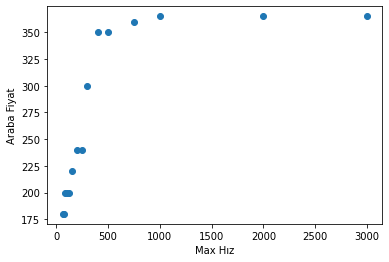

In [20]:
plt.scatter(x,y);
plt.xlabel("Max Hız");
plt.ylabel("Araba Fiyat");

In [21]:
lr=LinearRegression()
lr.fit(x,y)

LinearRegression()

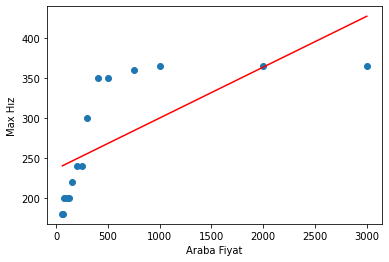

In [23]:
plt.scatter(x,y);
plt.ylabel("Max Hız");
plt.xlabel("Araba Fiyat");

y_head=lr.predict(x)

plt.plot(x, y_head, color="r");

In [26]:
lr.predict([[15000]])

array([[1189.34804442]])

Lineer olmayan değişkenlere sahip olan veri setlerinde Lineer Regresyon ile tahminde bulunmaya çalıştığımız taktirde sağlıklı olmayan sonuçlara ulaşırız.

15000 ücretlik aracın hızı 1189 olması gibi.

---


**Linear Regression           => y=b0+b1*x**

**Multiple Linear Regression  => y=b0+ b1*x1 +b2*x2+... bn*xn**

**Polnomial Linear Regression => y=b0+ b1*x+ b2*x²+ ... bn*xⁿ**

Veri setinde x² feature yer almadığı için x² feature elde edilmesi gerekir.

In [27]:
from sklearn.preprocessing import PolynomialFeatures

In [34]:
#degree maxsimum x² olması için
polynomial_r=PolynomialFeatures(degree=4)

Araba fiyatını 2. dereceden polynomial featurea çevirilmesi

In [36]:
x_polynomial=polynomial_r.fit_transform(x)

In [37]:
x_polynomial

array([[1.0000000e+00, 6.0000000e+01, 3.6000000e+03, 2.1600000e+05,
        1.2960000e+07],
       [1.0000000e+00, 7.0000000e+01, 4.9000000e+03, 3.4300000e+05,
        2.4010000e+07],
       [1.0000000e+00, 8.0000000e+01, 6.4000000e+03, 5.1200000e+05,
        4.0960000e+07],
       [1.0000000e+00, 1.0000000e+02, 1.0000000e+04, 1.0000000e+06,
        1.0000000e+08],
       [1.0000000e+00, 1.2000000e+02, 1.4400000e+04, 1.7280000e+06,
        2.0736000e+08],
       [1.0000000e+00, 1.5000000e+02, 2.2500000e+04, 3.3750000e+06,
        5.0625000e+08],
       [1.0000000e+00, 2.0000000e+02, 4.0000000e+04, 8.0000000e+06,
        1.6000000e+09],
       [1.0000000e+00, 2.5000000e+02, 6.2500000e+04, 1.5625000e+07,
        3.9062500e+09],
       [1.0000000e+00, 3.0000000e+02, 9.0000000e+04, 2.7000000e+07,
        8.1000000e+09],
       [1.0000000e+00, 4.0000000e+02, 1.6000000e+05, 6.4000000e+07,
        2.5600000e+10],
       [1.0000000e+00, 5.0000000e+02, 2.5000000e+05, 1.2500000e+08,
        6.25

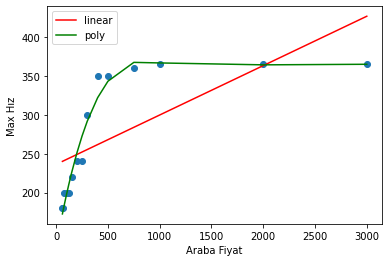

In [38]:
plt.scatter(x,y);
plt.ylabel("Max Hız");
plt.xlabel("Araba Fiyat");

y_head=lr.predict(x)

plt.plot(x, y_head, color="r",label="linear");
##-------------

lr2=LinearRegression()
lr2.fit(x_polynomial,y)

y_head2=lr2.predict(x_polynomial)

plt.plot(x, y_head2, color="green",label="poly")
plt.legend();